# Author name: Ankit Prasad
Date: 05-08-2021

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,explained_variance_score,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.models import load_model
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Data loading and preprocessing

In [2]:
df = pd.read_csv("Twitter.csv") # loading the dataset

In [3]:
df.head() # Data visualisation

,Unnamed: 0,Id,Post Contet,Sentiment score,Post Length,Hashtag count,Content URL count,Tweet count,Followers count,Listed Count,Media Type,Published DateTime,Mentions Count,Post author verified,Likes,Shares,Comments,Impact
0,41370,6d967b125fcecba6357dbc43f8f380cf2d6d7a51,Sana all na lang.,0.0,17.0,0.0,0.0,1660.0,133.0,0,TEXT,2021-01-28 12:17:24+00:00,0.0,0.0,0.0,0.0,0.0,0.0
1,27955,22dc5f808a8589186767412f39e5c88ae9753d04,キスマイ玉森裕太「ボス恋」台本の裏話明かす\n\n@TBS_asachan @bosskoi...,19.3,84.0,0.0,1.0,318924.0,1428273.0,5454,TEXT,2021-02-24 06:51:02+00:00,0.0,1.0,10.0,1.0,0.0,110.0
2,38151,7f224e66ad757e3066d45947881bcaab91f8e57f,SuperM’s album isn’t even out yet and there’s ...,0.0,78.0,0.0,0.0,39976.0,1560.0,0,TEXT,2020-09-15 01:16:32+00:00,0.0,0.0,0.0,0.0,0.0,0.0
3,13558,5acc220e7a337efafc4c847b7f74680ca2515890,மத்திய அரசின் நலத்திட்டங்களை மக்களுக்கு சென்று...,0.0,284.0,2.0,0.0,8045.0,27191.0,26,TEXT,2021-02-14 03:53:53+00:00,0.0,1.0,460.0,219.0,4.0,6830.0
4,17071,863abf834897a06afdc459788b34abeae6298f3a,【熊本県人吉市】球磨川氾濫後のくま川鉄道の線路被害状況 hamusoku.com/archi...,-20.0,80.0,0.0,1.0,210996.0,2385.0,0,IMAGE,2020-07-04 13:06:16+00:00,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info() # checking type in all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            50000 non-null  int64  
 1   Id                    50000 non-null  object 
 2   Post Contet           50000 non-null  object 
 3   Sentiment score       50000 non-null  float64
 4   Post Length           50000 non-null  float64
 5   Hashtag count         50000 non-null  float64
 6   Content URL count     50000 non-null  float64
 7   Tweet count           50000 non-null  float64
 8   Followers count       50000 non-null  float64
 9   Listed Count          50000 non-null  int64  
 10  Media Type            50000 non-null  object 
 11  Published DateTime    50000 non-null  object 
 12  Mentions Count        50000 non-null  float64
 13  Post author verified  50000 non-null  float64
 14  Likes                 50000 non-null  float64
 15  Shares             

In [5]:
df.nunique() # Checking unique values in each columns 

Unnamed: 0              27991
Id                      47512
Post Contet             47429
Sentiment score          2100
Post Length               329
Hashtag count              21
Content URL count           8
Tweet count             39328
Followers count         39024
Listed Count            13950
Media Type                  3
Published DateTime      47412
Mentions Count             13
Post author verified        2
Likes                    9525
Shares                   5535
Comments                  465
Impact                  10809
dtype: int64

<AxesSubplot:>

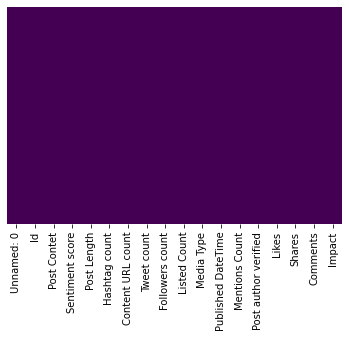

In [6]:
# Visualising the null values in dataset
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [7]:
df.isna().sum()

Unnamed: 0              0
Id                      0
Post Contet             0
Sentiment score         0
Post Length             0
Hashtag count           0
Content URL count       0
Tweet count             0
Followers count         0
Listed Count            0
Media Type              0
Published DateTime      0
Mentions Count          0
Post author verified    0
Likes                   0
Shares                  0
Comments                0
Impact                  0
dtype: int64

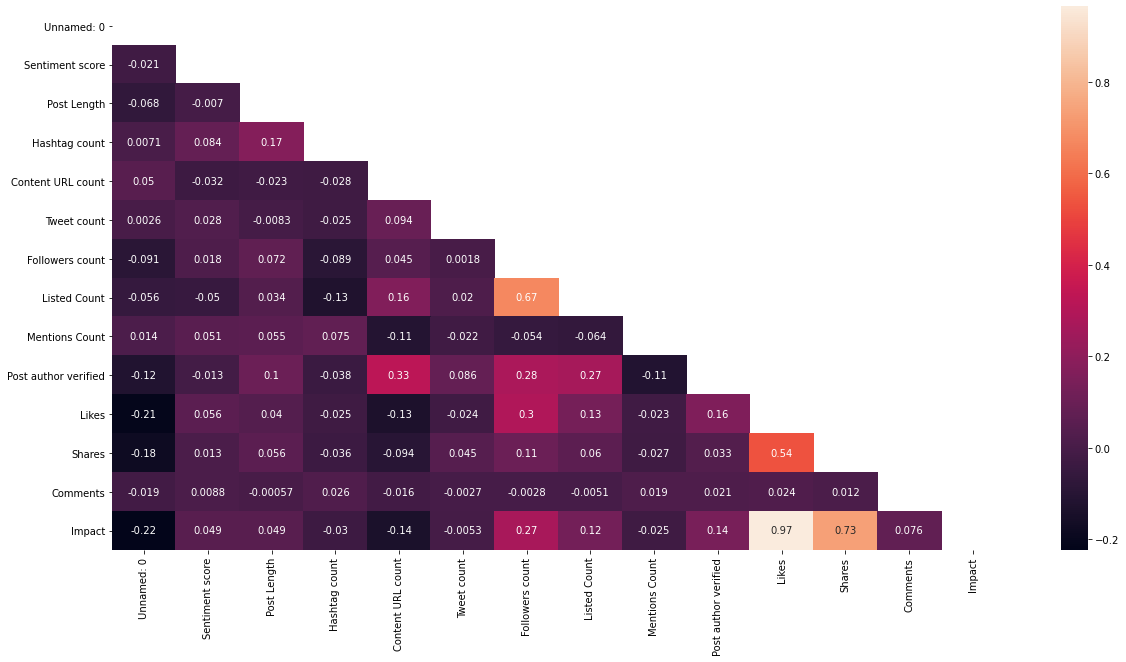

In [8]:
# Checking correlation between each columns
corr = df.corr()
plt.figure(figsize=(20,10))
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

In [9]:
# Removing columns which are not corelated to impact column
df.drop(columns=['Unnamed: 0','Id','Post Contet','Content URL count','Tweet count','Mentions Count',
                 'Published DateTime'],inplace=True)

In [10]:
# Renaming columns name for ease of access
df.rename(columns = {'Media Type':'Media_type','Sentiment score':'Sentiment_score',
                    'Post Length':'Post_Length','Hashtag count':'Hashtag_count',
                    'Followers count':'Followers_count','Listed Count':'Listed_Count',
                    'Post author verified':'Post_author_verified'},inplace=True)

In [11]:
# convert into category of object type column
df['Media_type']=df.Media_type.astype('category')
df['Media_type']=df.Media_type.cat.codes
df.head()

,Sentiment_score,Post_Length,Hashtag_count,Followers_count,Listed_Count,Media_type,Post_author_verified,Likes,Shares,Comments,Impact
0,0.0,17.0,0.0,133.0,0,1,0.0,0.0,0.0,0.0,0.0
1,19.3,84.0,0.0,1428273.0,5454,1,1.0,10.0,1.0,0.0,110.0
2,0.0,78.0,0.0,1560.0,0,1,0.0,0.0,0.0,0.0,0.0
3,0.0,284.0,2.0,27191.0,26,1,1.0,460.0,219.0,4.0,6830.0
4,-20.0,80.0,0.0,2385.0,0,0,0.0,0.0,0.0,0.0,0.0


In [12]:
labels = df.pop('Impact')

In [13]:
# Making of training and testing dataset
x_train,x_test,y_train,y_test = train_test_split(df,labels,random_state=55)

In [14]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((37500, 10), (12500, 10), (37500,), (12500,))

# Data Modeling

## 1. Using decision trees(with boosting and pruning)

In [15]:
%%time
# 1.1 Adaboostregressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
pred = ada.predict(x_test)
print("r2 score is:",r2_score(y_test,pred))
print("mean absolute error is:",mean_absolute_error(y_test,pred))

r2 score is: 0.7403886241022306
mean absolute error is: 52243.87869209471
Wall time: 3.47 s


In [16]:
%%time
# 1.2 Extra trees regressor
extree = ExtraTreesRegressor()
extree.fit(x_train,y_train)
pred = extree.predict(x_test)
print("r2 score is:",r2_score(y_test,pred))
print("mean absolute error is:",mean_absolute_error(y_test,pred))

r2 score is: 0.9994362017525215
mean absolute error is: 209.56919200000004
Wall time: 13.4 s


In [17]:
%%time
# 1.3 Random Forest regressor
ran = RandomForestRegressor()
ran.fit(x_train,y_train)
pred = ran.predict(x_test)
print("r2 score is:",r2_score(y_test,pred))
print("mean absolute error is:",mean_absolute_error(y_test,pred))

r2 score is: 0.9990475596883083
mean absolute error is: 428.76892799999996
Wall time: 23 s


In [18]:
%%time
# 1.4 XGBboost regressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)
print("r2 score is:",r2_score(y_test,pred))
print("mean absolute error is:",mean_absolute_error(y_test,pred))

r2 score is: 0.9992741322138515
mean absolute error is: 694.9607264678955
Wall time: 2.99 s


## 2. Linear Regression

In [19]:
%%time
lin = LinearRegression()
lin.fit(x_train,y_train)
pred = lin.predict(x_test)
print("r2 score is:",r2_score(y_test,pred))
print("mean absolute error is:",mean_absolute_error(y_test,pred))

r2 score is: 0.9999999992634825
mean absolute error is: 0.27769493951341495
Wall time: 46.8 ms


## Exploring predictions with robust scaler preprocessing

In [20]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [21]:
%%time
ada = AdaBoostRegressor()
ada.fit(X_train,y_train)
pred = ada.predict(X_test)
print("r2 score is:",r2_score(y_test,pred))
print("mean absolute error is:",mean_absolute_error(y_test,pred))

r2 score is: 0.7017498470283272
mean absolute error is: 55833.84883158717
Wall time: 3.01 s


In [22]:
%%time
extree = ExtraTreesRegressor()
extree.fit(X_train,y_train)
pred = extree.predict(X_test)
print("r2 score is:",r2_score(y_test,pred))
print("mean absolute error is:",mean_absolute_error(y_test,pred))

r2 score is: 0.9994573887118896
mean absolute error is: 215.31600799999998
Wall time: 11.2 s


In [23]:
%%time
ran = RandomForestRegressor()
ran.fit(X_train,y_train)
pred = ran.predict(X_test)
print("r2 score is:",r2_score(y_test,pred))
print("mean absolute error is:",mean_absolute_error(y_test,pred))

r2 score is: 0.9990793252287478
mean absolute error is: 422.79596
Wall time: 21.8 s


In [24]:
%%time
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
pred = xgb.predict(X_test)
print("r2 score is:",r2_score(y_test,pred))
print("mean absolute error is:",mean_absolute_error(y_test,pred))

r2 score is: 0.9992743779807451
mean absolute error is: 695.0300918585206
Wall time: 3.04 s


In [25]:
%%time
lin = LinearRegression()
lin.fit(X_train,y_train)
pred = lin.predict(X_test)
print("r2 score is:",r2_score(y_test,pred))
print("mean absolute error is:",mean_absolute_error(y_test,pred))

r2 score is: 0.9999999992634825
mean absolute error is: 0.27769493954150004
Wall time: 19.4 ms


### Note: Here we can see by using robust scaler there is not much difference in results. So we won't be using it. 

## 3. Neural network regressor

In [26]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(1024, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(512,activation='relu'))
NN_model.add(Dense(512,activation='relu'))
NN_model.add(Dropout(0.15))
NN_model.add(Dense(156,activation='relu'))
NN_model.add(Dense(16,activation='relu'))

# The Output Layer :
NN_model.add(Dense(1))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [27]:
checkpoint = ModelCheckpoint("./checkpoint/",monitor='val_loss', verbose = 0, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [28]:
%%time
NN_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split = 0.2, 
             callbacks=callbacks_list,verbose=0)

INFO:tensorflow:Assets written to: ./checkpoint\assets


INFO:tensorflow:Assets written to: ./checkpoint\assets


INFO:tensorflow:Assets written to: ./checkpoint\assets


INFO:tensorflow:Assets written to: ./checkpoint\assets


INFO:tensorflow:Assets written to: ./checkpoint\assets


INFO:tensorflow:Assets written to: ./checkpoint\assets


Wall time: 46.6 s


In [29]:
model = load_model("./checkpoint/")

In [30]:
pred = model.predict(x_test)
print("r2 score is:",r2_score(y_test,pred))
print("mean absolute error is:",mean_absolute_error(y_test,pred))

r2 score is: 0.3535040742490083
mean absolute error is: 23315.892936959208


# Best model 

## Linear Regression (For the given dataset)

In [31]:
%%time
# Best results in terms of accuracy as well as wall time to run the model.
lin = LinearRegression()
lin.fit(x_train,y_train)
pred = lin.predict(x_test)
print("r2 score is:",r2_score(y_test,pred))
print("mean absolute error is:",mean_absolute_error(y_test,pred))
print("Explained variance score is:",explained_variance_score(y_test,pred))
print("mean squared error is:",mean_squared_error(y_test,pred))

r2 score is: 0.9999999992634825
mean absolute error is: 0.27769493951341495
Explained variance score is: 0.9999999992640659
mean squared error is: 8.265401442597105
Wall time: 41.5 ms
